# (9주차) 10월31일 -- draft
> 순환신경망 -- 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 

In [ ]:
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

## 순환신경망 motivation -- abab

### data

In [ ]:
txt = list('ab')*100
txt[:10]

['a', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'b']

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'a', 'b', 'a'], ['b', 'a', 'b', 'a', 'b'])

### arch1 (last layer = linear)

#### (풀이1) 1개의 파라메터 -- 실패

In [ ]:
x = torch.tensor(f(txt_x,{'a':0,'b':1})).float().reshape(-1,1)
y = torch.tensor(f(txt_y,{'a':0,'b':1})).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

(tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.]]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(1000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

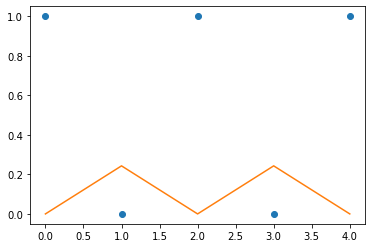

In [ ]:
plt.plot(y[:5],'o')
plt.plot(net(x).data[:5])

- 이건 못해..

#### (풀이2) 1개의 파라메터 -- 성공, 그런데 오늘만 살꺼야? 

In [ ]:
x = torch.tensor(f(txt_x,{'a':-1,'b':1})).float().reshape(-1,1) 
y = torch.tensor(f(txt_y,{'a':-1,'b':1})).float().reshape(-1,1)

- 족보도 없는 인코딩

In [ ]:
x[:5],y[:5]

(tensor([[-1.],
         [ 1.],
         [-1.],
         [ 1.],
         [-1.]]),
 tensor([[ 1.],
         [-1.],
         [ 1.],
         [-1.],
         [ 1.]]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(2000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

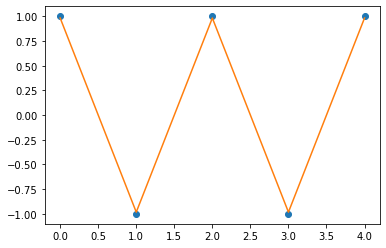

In [ ]:
plt.plot(y[:5],'o')
plt.plot(net(x).data[:5])

- 딱봐도 클래스가 3개일 경우 확장이 어려워 보인다. 

### arch2 (last layer = sigmoid)

#### (풀이1) 1개의 파라메터 -- 실패

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

(tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.]]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net[0].weight

Parameter containing:
tensor([[0.7078]], requires_grad=True)

In [ ]:
net[0].weight.data @ x[0] 

tensor([0.])

In [ ]:
net(x)[0]

tensor([0.], grad_fn=<SelectBackward0>)

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

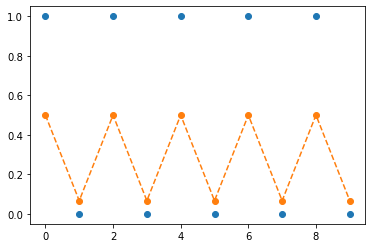

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

- 이게 한계

#### (풀이2) 2개의 파라메터 + 좋은 초기값 -- 성공

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

(tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.]]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True)
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net[0].weight.data = torch.tensor([[-5.00]])
net[0].bias.data = torch.tensor([+2.500])

In [ ]:
net(x)[:10]

tensor([[ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000]], grad_fn=<SliceBackward0>)

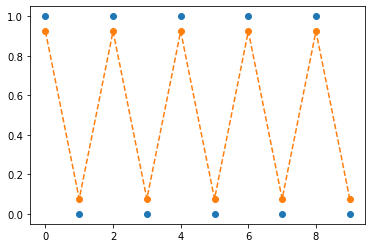

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

In [ ]:
for epoc in range(2000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

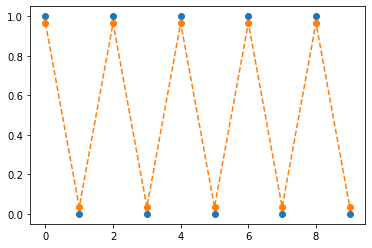

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

#### (풀이3) 2개의 파라메터 + 나쁜초기값 -> 성공..??

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

(tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.]]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True)
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net[0].weight.data = torch.tensor([[+5.00]])
net[0].bias.data = torch.tensor([-2.500])

In [ ]:
net(x)[:10]

tensor([[-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000],
        [-2.5000],
        [ 2.5000]], grad_fn=<SliceBackward0>)

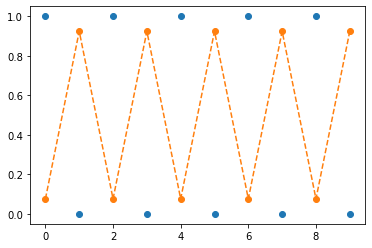

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

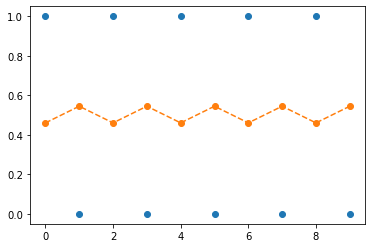

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

- 될거같긴한데.. 느릴것 같다. 

---

(예비학습)

In [ ]:
net(x)[:5]

tensor([[-0.1584],
        [ 0.1797],
        [-0.1584],
        [ 0.1797],
        [-0.1584]], grad_fn=<SliceBackward0>)

In [ ]:
net.forward(x)[:5]

tensor([[-0.1584],
        [ 0.1797],
        [-0.1584],
        [ 0.1797],
        [-0.1584]], grad_fn=<SliceBackward0>)

---

#### (풀이4) 3개의 파라메터를 쓴다면? 

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

(tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.]]))

In [ ]:
class Mynet1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.a1 = torch.nn.Sigmoid()
        self.l2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        yhat = self.l2(self.a1(self.l1(x)))
        return yhat

In [ ]:
class Mynet2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.a1 = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        yhat = self.l2(self.a1(self.l1(x)))
        return yhat

In [ ]:
class Mynet3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.a1 = torch.nn.Tanh()
        self.l2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        yhat = self.l2(self.a1(self.l1(x)))
        return yhat

`-` Sigmoid

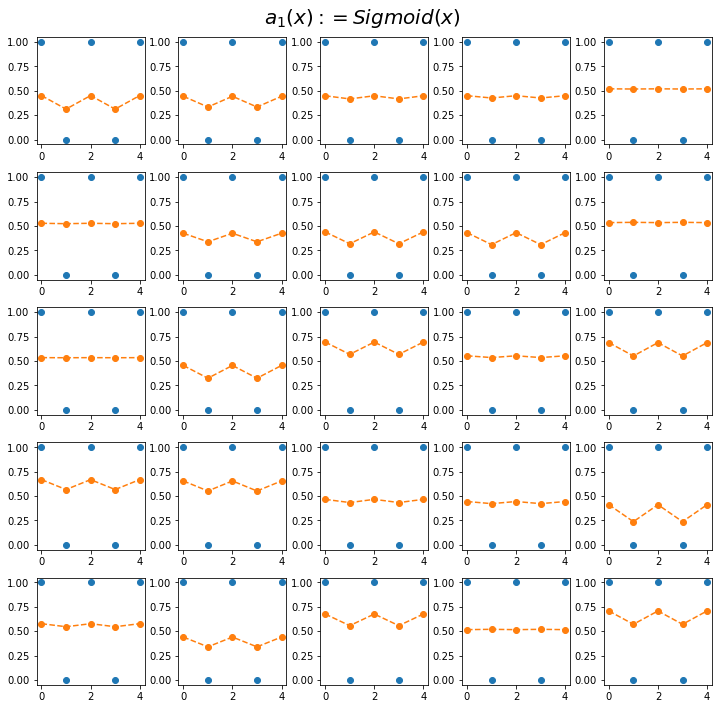

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Mynet1()
        optimizr = torch.optim.Adam(net.parameters())
        for epoc in range(1000):
            ## 1
            yhat = net(x)
            ## 2
            loss = loss_fn(yhat,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        ax[i][j].plot(y[:5],'o')
        ax[i][j].plot(sig(net(x[:5])).data,'--o')
fig.suptitle(r"$a_1(x):=Sigmoid(x)$",size=20)
fig.tight_layout()

`-` ReLU

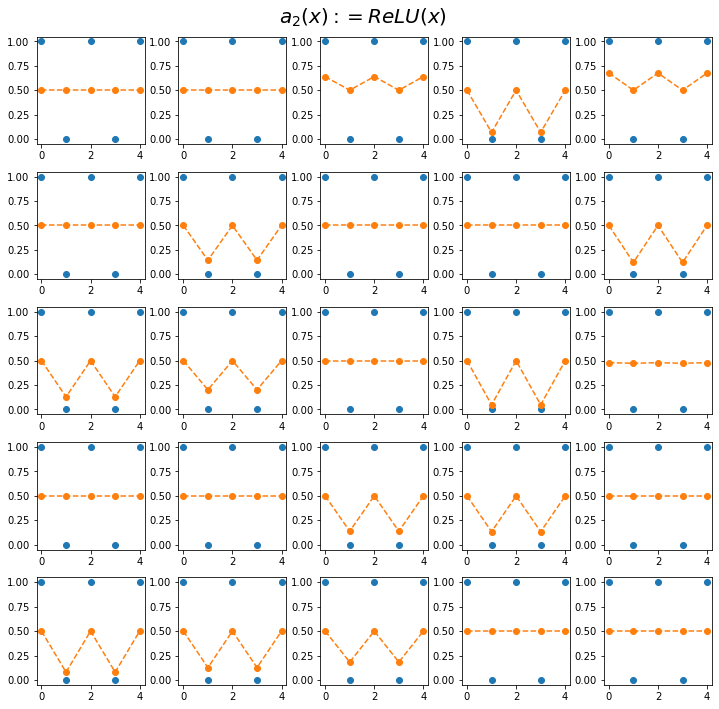

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Mynet2()
        optimizr = torch.optim.Adam(net.parameters())
        for epoc in range(1000):
            ## 1
            yhat = net(x)
            ## 2
            loss = loss_fn(yhat,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        ax[i][j].plot(y[:5],'o')
        ax[i][j].plot(sig(net(x[:5])).data,'--o')
fig.suptitle(r"$a_2(x):=ReLU(x)$",size=20)
fig.tight_layout()

`-` Tanh

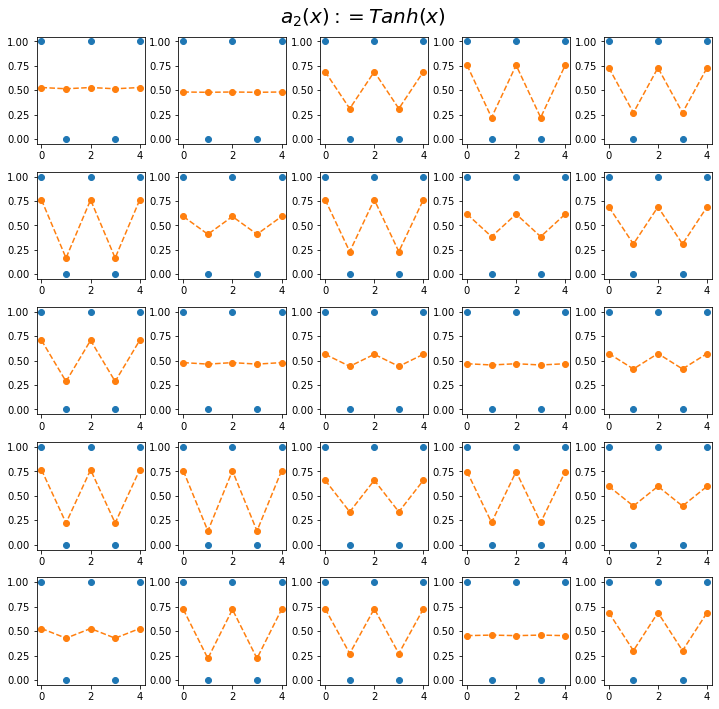

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Mynet3()
        optimizr = torch.optim.Adam(net.parameters())
        for epoc in range(1000):
            ## 1
            yhat = net(x)
            ## 2
            loss = loss_fn(yhat,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        ax[i][j].plot(y[:5],'o')
        ax[i][j].plot(sig(net(x[:5])).data,'--o')
fig.suptitle(r"$a_2(x):=Tanh(x)$",size=20)        
fig.tight_layout()

### arch3 (last layer = softmax)

#### (풀이1) 

In [ ]:
mapping = {'a':[1,0],'b':[0,1]}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,2)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,2)
x[:5],y[:5]

(tensor([[1., 0.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [1., 0.]]),
 tensor([[0., 1.],
         [1., 0.],
         [0., 1.],
         [1., 0.],
         [0., 1.]]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=2)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
y[:5][:,0]

tensor([0., 1., 0., 1., 0.])

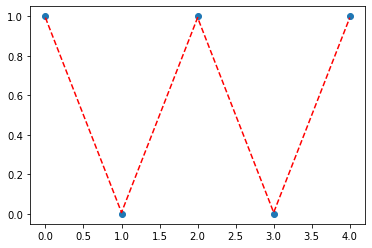

In [ ]:
plt.plot(y[:5][:,1],'o')
plt.plot(soft(net(x[:5]))[:,1].data,'--r')

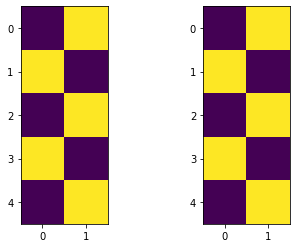

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(y[:5])
ax[1].imshow(soft(net(x[:5])).data)

#### (풀이2) Embedding 이용 

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 1, 0]), tensor([1, 0, 1, 0, 1]))

In [ ]:
e1 = torch.nn.Embedding(num_embeddings=2,embedding_dim=1)

In [ ]:
e1.weight

Parameter containing:
tensor([[-0.5432],
        [ 0.2588]], requires_grad=True)

In [ ]:
e1(x)[0:4]

tensor([[-0.5432],
        [ 0.2588],
        [-0.5432],
        [ 0.2588]], grad_fn=<SliceBackward0>)

In [ ]:
torch.tensor([[1,0],[0,1]])

tensor([[1, 0],
        [0, 1]])

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=2,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=2)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net(x).shape

torch.Size([199, 2])

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

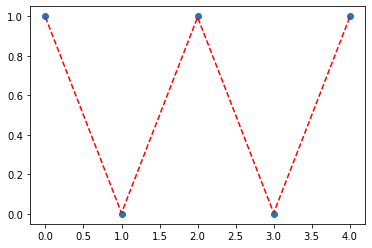

In [ ]:
plt.plot(y[:5],'o')
plt.plot(soft(net(x[:5]))[:,1].data,'--r')

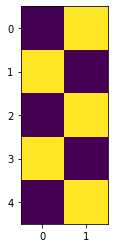

In [ ]:
plt.imshow(soft(net(x[:5])).data)

## 순환신경망 motivation -- abcabc

### data

In [ ]:
txt = list('abc')*100
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'a', 'b'], ['b', 'c', 'a', 'b', 'c'])

### sol

In [ ]:
mapping = {'a':0,'b':1,'c':2}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 0, 1]), tensor([1, 2, 0, 1, 2]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net(x).shape

torch.Size([299, 3])

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

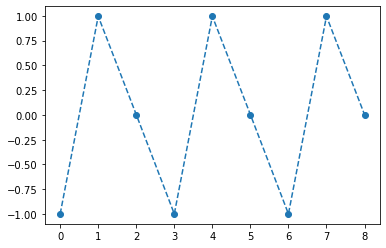

In [ ]:
plt.plot(net[0:2](x[:9]).data,'--o')

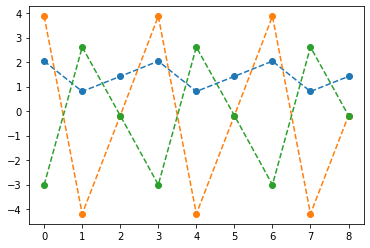

In [ ]:
plt.plot(net[0:3](x[:9]).data,'--o')

- 억지로 맞추고있긴한데 파라메터가 부족해보인다. 

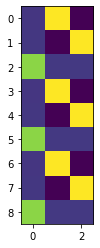

In [ ]:
plt.imshow(soft(net(x[:9])).data)

## 순환신경망 motivation -- abcdabcd

### data

In [ ]:
txt = list('abcd')*100
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'a'], ['b', 'c', 'd', 'a', 'b'])

### sol -- 실패

In [ ]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net(x).shape

torch.Size([399, 4])

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

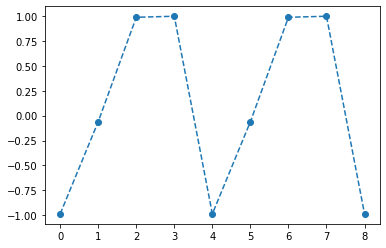

In [ ]:
plt.plot(net[0:2](x[:9]).data,'--o')

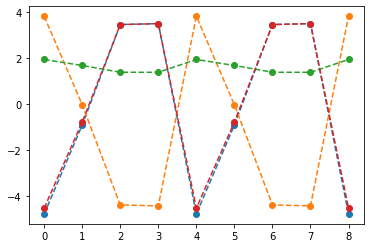

In [ ]:
plt.plot(net[0:3](x[:9]).data,'--o')

- 이제 못함

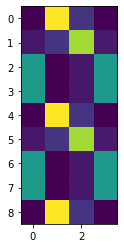

In [ ]:
plt.imshow(soft(net(x[:9])).data)

### sol -- 성공

In [ ]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net(x).shape

torch.Size([399, 4])

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

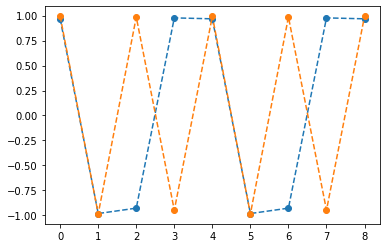

In [ ]:
plt.plot(net[0:2](x[:9]).data,'--o')

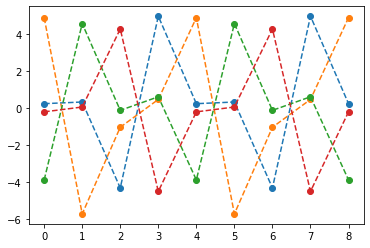

In [ ]:
plt.plot(net[0:3](x[:9]).data,'--o')

- 성공

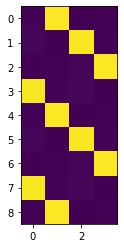

In [ ]:
plt.imshow(soft(net(x[:9])).data) ## 깔끔한 성공

## 순환신경망 motivation -- AbAcAdAbAcAd

### data

In [ ]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

### sol -- 예상한 실패

In [ ]:
mapping = {'A':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net(x).shape

torch.Size([599, 4])

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

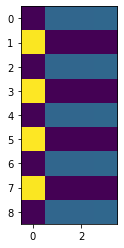

In [ ]:
plt.imshow(soft(net(x[:9])).data) 

- b,c,d는 사실 소문자라는 측면에서 공통점이 있음 
- b,c,d는 퉁쳐서 한 문자로 취급

### sol -- 예상못한실패

In [ ]:
mapping = {'A':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
net(x).shape

torch.Size([599, 4])

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

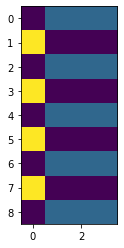

In [ ]:
plt.imshow(soft(net(x[:9])).data) ## 한계상황

- 파라메터 더 많이 써봤자 안될듯 

### 조금 낯선 표현 

In [ ]:
## net 
i2h = torch.nn.Embedding(num_embeddings=4,embedding_dim=2)
    # 4 is input size, 2 is hidden size 
tanh = torch.nn.Tanh()
h2o = torch.nn.Linear(in_features=2,out_features=4)
    # 2 is hidden size, 4 is output size 
    
## loss_fn
loss_fn = torch.nn.CrossEntropyLoss()
## optimizr 
# optimizr = torch.optim.Adam(net.parameters())

`-` step1~2

(for문을 이용하여 loss구하기)

In [ ]:
T = len(x)

In [ ]:
loss = 0 
for t in range(T):
    x_t = x[[t]]
    y_t = y[[t]]
    h_t = tanh(i2h(x_t))
    yhat_t = h2o(h_t) # softmax 전 
    loss += loss_fn(yhat_t,y_t) 
loss = loss/T
loss

tensor(1.2807, grad_fn=<DivBackward0>)

(하던대로 loss구하기)

In [ ]:
net = torch.nn.Sequential(i2h,tanh,h2o)
loss_fn(net(x),y)

tensor(1.2807, grad_fn=<NllLossBackward0>)

`-` step3

In [ ]:
loss.backward()

`-` step4

In [ ]:
# 
# optimizr = torch.optim.Adam(net.parameters()) <-- 여기서 막힌다..

---

완성하려면?

`-` step1~2

In [ ]:
class RNN0(torch.nn.Module): ## RNN을 이해하기 위한 네트워크, 실제로 순환신경망은 아님
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Embedding(num_embeddings=4,embedding_dim=2)
        self.tanh = torch.nn.Tanh()
        self.h2o = torch.nn.Linear(in_features=2,out_features=4)
    def forward(self,x_t):
        h_t = self.tanh(self.i2h(x_t))
        yhat_t = self.h2o(h_t)
        return yhat_t 

In [ ]:
rnn0 = RNN0()

In [ ]:
loss = 0 
for t in range(T):
    x_t = x[[t]]
    y_t = y[[t]]
    yhat_t = rnn0(x_t)
    loss += loss_fn(yhat_t,y_t) 
loss = loss/T
loss

tensor(1.5341, grad_fn=<DivBackward0>)

(잘 코딩했나 확인)

In [ ]:
net = torch.nn.Sequential(
    rnn0.i2h,
    rnn0.tanh,
    rnn0.h2o
)

In [ ]:
loss_fn(net(x),y)

tensor(1.5341, grad_fn=<NllLossBackward0>)

`-` step3

In [ ]:
loss.backward()

`-` step4

In [ ]:
optimizr = torch.optim.Adam(rnn0.parameters())

In [ ]:
optimizr.step()
optimizr.zero_grad()

`-` 반복

In [ ]:
torch.manual_seed(43052)
rnn0 = RNN0()
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(rnn0.parameters())

In [ ]:
for epoc in range(5):
    ## 1 ~ 2 
    loss = 0 
    for t in range(T):
        x_t = x[[t]]
        y_t = y[[t]]
        yhat_t = rnn0(x_t)
        loss += loss_fn(yhat_t,y_t) 
    loss = loss/T
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
rnn0(x)[0]

tensor([ 0.0196, -0.8627,  0.4574,  0.4201], grad_fn=<SelectBackward0>)

(확인)

In [ ]:
torch.manual_seed(43052)
rnn0 = RNN0()
net = torch.nn.Sequential(
    rnn0.i2h,
    rnn0.tanh,
    rnn0.h2o
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(5):
    ## 1 ~ 2 
    loss = loss_fn(net(x),y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
net(x)[0]

tensor([ 0.0196, -0.8627,  0.4574,  0.4201], grad_fn=<SelectBackward0>)

### sol -- 순환신경망

In [ ]:
torch.manual_seed(43052)
rnn = torch.nn.RNN(input_size=4,hidden_size=2)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(rnn.parameters())

In [ ]:
x.shape

torch.Size([599])

In [ ]:
torch.nn.functional.one_hot(x).shape

torch.Size([599, 4])

In [ ]:
torch.nn.functional.one_hot(x).float()[0]

tensor([1., 0., 0., 0.])

In [ ]:
output,hnn = rnn(torch.nn.functional.one_hot(x).float()[[0]])

In [ ]:
output.shape, hnn.shape

(torch.Size([1, 2]), torch.Size([1, 2]))